In [108]:
import pickle
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [109]:
PATH = 'GE_all_data.p'
data = pickle.load(open(PATH,'rb')) # Loading in the data

In [110]:
data # data is a dictionary. the keys are cancer subtype, and the values are Pandas Dataframes with data

{'SKCM':               TCGA-W3-AA21  TCGA-ER-A19F  TCGA-BF-AAP4  TCGA-EE-A2MF  \
 A1BG              504.5047      244.8919      336.4169      331.2836   
 A2M              3941.9447    16349.6542    17552.2154    47838.7504   
 NAT1               39.1032       84.4794       56.5111       45.9054   
 NAT2                0.0000        0.0000        0.0000        0.0000   
 RP11-986E7.7     1131.3869      160.3143       90.4996     2724.2845   
 ...                    ...           ...           ...           ...   
 RASAL2-AS1         22.4192       19.0177      161.1548       16.7186   
 LINC00882           6.2565        0.7859        0.8190        7.9343   
 FTX                11.4703       19.6464       13.1040       10.2012   
 TICAM2             93.7696      126.9548       74.0090      387.7274   
 SLC25A5-AS1        22.4192       27.1120       36.0360       33.7206   
 
               TCGA-EE-A2MJ  TCGA-D3-A8GM  TCGA-GN-A26A  TCGA-EB-A3XE  \
 A1BG               56.9041      183.3201

In [111]:
# some subtypes are: SKCM, COAD, PAAD, KIRC, BLCA, BRCA, KICH
# Let's look at COAD (colon cancer)
coad_data = data['COAD'].T
paad_data = data['PAAD'].T
skcm_data = data['SKCM'].T
kirc_data = data['KIRC'].T
blca_data = data['BLCA'].T
brca_data = data['BRCA'].T
kich_data = data['KICH'].T
coad_data # the columns are patients ids, and the rows are different genes. each value is a gene expression reading

,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,...,ULK4P1,WASH2P,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2,SLC25A5-AS1
TCGA-AM-5820,4.5929,5207.9207,148.2255,120.6681,136.9520,2.5052,3113.5699,0.4175,5768.6848,275.5741,...,0.4175,205.1816,0.4175,385.8038,0.0000,6.2630,0.8351,24.6347,184.0167,7.0981
TCGA-D5-6920,27.1102,7453.5315,295.6693,206.2992,735.4331,4.7244,2560.6299,0.7874,3580.3150,863.7795,...,0.3937,418.6496,0.0000,184.6457,0.0000,17.4173,0.0000,22.0472,90.5079,10.2362
TCGA-DM-A1HB,13.5120,1526.4759,146.2825,7.2537,593.5926,29.0147,3072.7383,0.4030,2618.5775,22.1640,...,1.2089,265.0776,0.0000,163.6107,0.0000,15.7163,0.0000,12.4924,86.5686,4.0298
TCGA-AA-3518,44.9556,14772.5062,457.3763,473.4911,113.7516,0.9479,3386.0067,0.4740,1916.2409,1638.4973,...,0.0000,376.8260,0.0000,179.1588,0.0000,8.1332,0.0000,15.1669,6.6687,26.0681
TCGA-F4-6461,28.1950,6893.5877,49.5822,22.2841,300.2786,5.5710,2570.4735,1.1142,3707.5209,177.1588,...,0.0000,367.3593,0.0000,245.6825,0.5571,15.0418,1.6713,46.2396,192.1226,13.3705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AA-3511,52.9298,10494.9244,398.2824,328.4566,393.2292,1.8375,3043.8513,0.9188,2335.0281,757.0581,...,0.0000,376.8569,0.0000,250.3620,0.0000,11.5810,0.0000,17.9158,49.8611,19.2940
TCGA-AA-3713,108.2812,8364.9483,1383.2048,746.9073,179.3043,1.1643,3322.9515,0.5822,1322.6605,652.5979,...,0.0000,257.8722,0.5822,196.1869,0.0000,18.0469,1.7465,13.3896,48.7207,26.7792
TCGA-AA-A02K,17.2968,1493.4739,83.8995,68.7896,3.5786,4.7715,4114.6520,0.0000,3699.1310,183.7040,...,0.0000,551.0524,0.0000,315.7164,0.7953,6.3620,15.9051,112.1310,161.2261,25.4482
TCGA-CK-5913,11.3589,3576.7648,420.6984,63.1048,193.1005,3.3656,3050.9045,0.4207,3822.4653,50.9045,...,4.2070,168.1195,0.0000,360.1178,0.0000,11.4724,0.0000,13.4623,96.8363,6.3105


<AxesSubplot:xlabel='A1BG'>

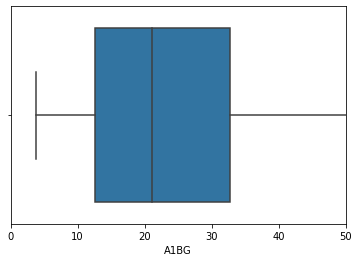

In [112]:
import matplotlib.pyplot as plt
plt.xlim(0, 50)
sns.boxplot(x = coad_data["A1BG"])

<AxesSubplot:xlabel='A1BG'>

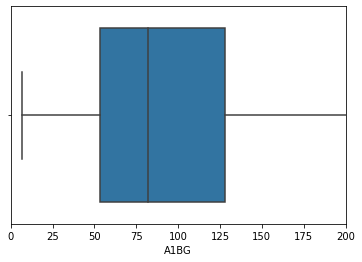

In [113]:
import matplotlib.pyplot as plt
plt.xlim(0, 200)
sns.boxplot(x = paad_data["A1BG"])

<AxesSubplot:xlabel='A1BG'>

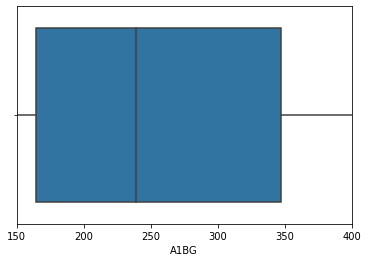

In [114]:
import matplotlib.pyplot as plt
plt.xlim(150, 400)
sns.boxplot(x = skcm_data["A1BG"])

<AxesSubplot:xlabel='A1BG'>

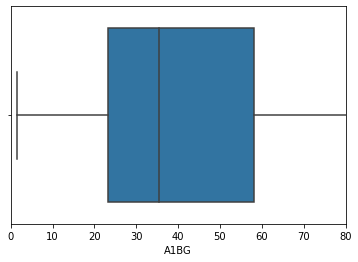

In [115]:
import matplotlib.pyplot as plt
plt.xlim(0, 80)
sns.boxplot(x = kirc_data["A1BG"])

<AxesSubplot:xlabel='A1BG'>

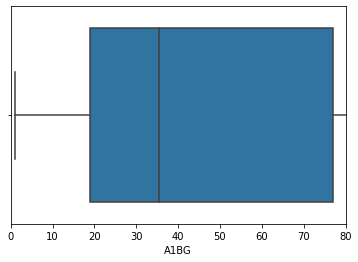

In [116]:
import matplotlib.pyplot as plt
plt.xlim(0, 80)
sns.boxplot(x = blca_data["A1BG"])

<AxesSubplot:xlabel='A1BG'>

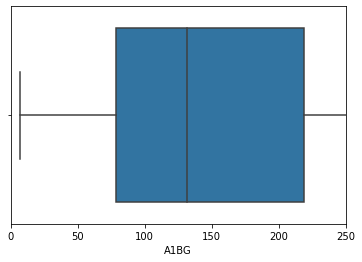

In [117]:
import matplotlib.pyplot as plt
plt.xlim(0, 250)
sns.boxplot(x = brca_data["A1BG"])

<AxesSubplot:xlabel='A1BG'>

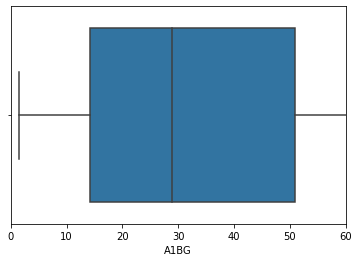

In [118]:
import matplotlib.pyplot as plt
plt.xlim(0, 60)
sns.boxplot(x = kich_data["A1BG"])

In [119]:
stats.ttest_ind(coad_data['A1BG'],skcm_data['A1BG'])

Ttest_indResult(statistic=-20.282740926343955, pvalue=4.194212838261431e-74)

In [120]:
stats.ttest_ind(blca_data['A1BG'],kich_data['A1BG'])

Ttest_indResult(statistic=2.263682512785669, pvalue=0.02400809563760292)

In [121]:
# We also have access to clinical data about each patient
CLINICAL_PATH = 'clinical_data/COAD.csv' # there is also BLCA.csv, BRCA.csv, KICH.csv, etc
coad_clinical_data = pd.read_csv(CLINICAL_PATH)
coad_clinical_data #ignore the "Unnamed: 0 column". The 'submitter_id' columns gives patient id, others are clinical info

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,...,treatments_radiation_treatment_or_therapy,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-A6-6650,No,Stage IIA,0.0,NaN,not reported,Ascending colon,627.0,25516.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A6-6650,COAD
1,2,TCGA-CM-5344,No,Stage IIIB,0.0,NaN,not reported,Sigmoid colon,670.0,14426.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-CM-5344,COAD
2,3,TCGA-CM-6162,No,Stage IIIB,0.0,NaN,not reported,Ascending colon,365.0,17624.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-CM-6162,COAD
3,4,TCGA-CM-6170,No,Stage I,0.0,NaN,not reported,Descending colon,457.0,26663.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-CM-6170,COAD
4,5,TCGA-A6-2683,No,Stage IV,0.0,NaN,not reported,Ascending colon,472.0,20871.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A6-2683,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,TCGA-NH-A6GA,No,Stage IIIC,0.0,NaN,not reported,Ascending colon,182.0,21313.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-NH-A6GA,COAD
457,458,TCGA-AA-A01C,No,Stage IIIA,0.0,NaN,not reported,Ascending colon,457.0,27729.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-AA-A01C,COAD
458,459,TCGA-AA-A00O,No,Stage IIIC,0.0,NaN,not reported,Sigmoid colon,822.0,30316.0,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-AA-A00O,COAD
459,460,TCGA-5M-AATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-5M-AATA,COAD


In [122]:
CLINICAL_PATH1 = 'clinical_data/BLCA.csv' 
blca_clinical_data = pd.read_csv(CLINICAL_PATH1)
blca_clinical_data 

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,...,treatments_radiation_treatment_type,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_initial_disease_status,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-2F-A9KW,No,Stage III,0,NaN,not reported,"Bladder, NOS",147.0,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,yes,NaN,NaN,NaN,NaN,TCGA-2F-A9KW,BLCA
1,2,TCGA-5N-A9KM,No,Stage III,0,NaN,not reported,"Bladder, NOS",NaN,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-5N-A9KM,BLCA
2,3,TCGA-KQ-A41S,No,Stage III,0,NaN,not reported,Posterior wall of bladder,35.0,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KQ-A41S,BLCA
3,4,TCGA-C4-A0F0,No,Stage II,0,NaN,not reported,"Bladder, NOS",59.0,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,not reported,NaN,NaN,NaN,NaN,TCGA-C4-A0F0,BLCA
4,5,TCGA-C4-A0F7,Not Reported,Stage IV,0,NaN,not reported,"Bladder, NOS",NaN,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,not reported,NaN,NaN,NaN,NaN,TCGA-C4-A0F7,BLCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,408,TCGA-DK-A6B1,Not Reported,Stage II,0,NaN,not reported,Anterior wall of bladder,2049.0,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-DK-A6B1,BLCA
408,409,TCGA-FJ-A3ZF,Not Reported,Stage III,0,NaN,not reported,"Bladder, NOS",524.0,Papillary transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-FJ-A3ZF,BLCA
409,410,TCGA-YC-A8S6,Not Reported,Stage II,0,NaN,not reported,"Bladder, NOS",293.0,Papillary transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-YC-A8S6,BLCA
410,411,TCGA-GV-A3JZ,Not Reported,Stage IV,0,NaN,not reported,"Bladder, NOS",603.0,Transitional cell carcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-GV-A3JZ,BLCA


In [123]:
CLINICAL_PATH2 = 'clinical_data/BRCA.csv' 
brca_clinical_data = pd.read_csv(CLINICAL_PATH2)
brca_clinical_data

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,...,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_or_therapy,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-A8-A07G,No,Stage IIA,0.0,NaN,not reported,"Breast, NOS",577.0,"Infiltrating duct carcinoma, NOS",...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A8-A07G,BRCA
1,2,TCGA-A2-A3XY,No,Stage IIB,0.0,NaN,not reported,"Breast, NOS",1064.0,"Infiltrating duct carcinoma, NOS",...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A2-A3XY,BRCA
2,3,TCGA-E2-A152,No,Stage I,0.0,NaN,not reported,"Breast, NOS",2128.0,"Infiltrating duct carcinoma, NOS",...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-E2-A152,BRCA
3,4,TCGA-E2-A15E,No,Stage IIA,0.0,NaN,not reported,"Breast, NOS",630.0,"Infiltrating duct carcinoma, NOS",...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-E2-A15E,BRCA
4,5,TCGA-AR-A0U0,No,Stage IIB,0.0,NaN,not reported,"Breast, NOS",1988.0,"Infiltrating duct carcinoma, NOS",...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-AR-A0U0,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1094,TCGA-C8-A133,No,Stage IIIA,0.0,NaN,not reported,"Breast, NOS",0.0,Infiltrating duct mixed with other types of ca...,...,NaN,not reported,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-C8-A133,BRCA
1094,1095,TCGA-A8-A07W,No,Stage IV,0.0,NaN,not reported,"Breast, NOS",304.0,"Infiltrating duct carcinoma, NOS",...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A8-A07W,BRCA
1095,1096,TCGA-A2-A0CM,No,Stage IIA,0.0,NaN,not reported,"Breast, NOS",NaN,"Infiltrating duct carcinoma, NOS",...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A2-A0CM,BRCA
1096,1097,TCGA-AC-A3YJ,No,Stage IIA,0.0,NaN,not reported,"Breast, NOS",754.0,"Papillary carcinoma, NOS",...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-AC-A3YJ,BRCA


In [124]:
CLINICAL_PATH3 = 'clinical_data/KICH.csv' # there is also BLCA.csv, BRCA.csv, KICH.csv, etc
kich_clinical_data = pd.read_csv(CLINICAL_PATH3)
kich_clinical_data #ignore the "Unnamed: 0 column". The 'submitter_id' columns gives patient id, others are clinical info

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,...,treatments_radiation_treatment_type,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_initial_disease_status,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-KL-8331,No,Stage II,0,NaN,not reported,"Kidney, NOS",3010.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KL-8331,KICH
1,2,TCGA-KN-8422,No,Stage I,0,NaN,not reported,"Kidney, NOS",775.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KN-8422,KICH
2,3,TCGA-UW-A7GN,No,Stage III,0,NaN,not reported,"Kidney, NOS",3036.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-UW-A7GN,KICH
3,4,TCGA-KM-A7Q9,No,Stage I,0,NaN,not reported,"Kidney, NOS",450.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KM-A7Q9,KICH
4,5,TCGA-KL-8338,No,Stage III,0,NaN,not reported,"Kidney, NOS",2633.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KL-8338,KICH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,TCGA-KM-A7QB,No,Stage I,0,NaN,not reported,"Kidney, NOS",1094.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KM-A7QB,KICH
109,110,TCGA-KO-8404,No,Stage IV,0,NaN,not reported,"Kidney, NOS",NaN,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-KO-8404,KICH
110,111,TCGA-UW-A72N,No,Stage I,0,NaN,not reported,"Kidney, NOS",397.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-UW-A72N,KICH
111,112,TCGA-UW-A72I,No,Stage I,0,NaN,not reported,"Kidney, NOS",26.0,"Renal cell carcinoma, chromophobe type",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-UW-A72I,KICH


In [125]:
CLINICAL_PATH4 = 'clinical_data/PAAD.csv' 
paad_clinical_data = pd.read_csv(CLINICAL_PATH4)
paad_clinical_data 

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,...,treatments_radiation_treatment_type,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_initial_disease_status,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-YB-A89D,No,Stage IIB,0.0,NaN,not reported,Body of pancreas,350.0,"Infiltrating duct carcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,yes,NaN,NaN,NaN,NaN,TCGA-YB-A89D,PAAD
1,2,TCGA-FB-A7DR,No,Stage IIA,0.0,NaN,not reported,Head of pancreas,166.0,Mucinous adenocarcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-FB-A7DR,PAAD
2,3,TCGA-HZ-7289,No,Stage IIB,0.0,NaN,not reported,Head of pancreas,240.0,"Adenocarcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,yes,NaN,NaN,NaN,NaN,TCGA-HZ-7289,PAAD
3,4,TCGA-IB-A5SO,No,Stage IIB,0.0,NaN,not reported,Head of pancreas,329.0,"Infiltrating duct carcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-IB-A5SO,PAAD
4,5,TCGA-IB-AAUT,No,Stage IIB,0.0,NaN,not reported,Head of pancreas,287.0,Mucinous adenocarcinoma,...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-IB-AAUT,PAAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181,TCGA-FB-AAPP,No,Stage IIB,0.0,NaN,not reported,Head of pancreas,NaN,"Infiltrating duct carcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,yes,NaN,NaN,NaN,NaN,TCGA-FB-AAPP,PAAD
181,182,TCGA-HZ-A8P0,No,Stage IIB,0.0,NaN,not reported,Head of pancreas,0.0,"Infiltrating duct carcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,not reported,NaN,NaN,NaN,NaN,TCGA-HZ-A8P0,PAAD
182,183,TCGA-XD-AAUG,No,Stage IV,0.0,NaN,not reported,Body of pancreas,420.0,"Infiltrating duct carcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,no,NaN,NaN,NaN,NaN,TCGA-XD-AAUG,PAAD
183,184,TCGA-HZ-8636,No,Stage IV,0.0,NaN,not reported,Tail of pancreas,5.0,"Infiltrating duct carcinoma, NOS",...,"Radiation Therapy, NOS",NaN,NaN,not reported,NaN,NaN,NaN,NaN,TCGA-HZ-8636,PAAD


In [126]:
CLINICAL_PATH5 = 'clinical_data/KIRC.csv' # there is also BLCA.csv, BRCA.csv, KICH.csv, etc
kirc_clinical_data = pd.read_csv(CLINICAL_PATH5)
kirc_clinical_data #ignore the "Unnamed: 0 column". The 'submitter_id' columns gives patient id, others are clinical info

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,...,treatments_radiation_treatment_id,treatments_radiation_treatment_or_therapy,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-B8-A54G,No,Stage I,0,NaN,not reported,"Kidney, NOS",53.0,18612.0,...,e0520613-f412-5b5e-a9dd-f5daac563995,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-B8-A54G,KIRC
1,2,TCGA-B0-4848,No,Stage III,0,NaN,not reported,"Kidney, NOS",NaN,19892.0,...,d6a3e271-5b66-5b4d-92bb-94e617952a61,not reported,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-B0-4848,KIRC
2,3,TCGA-AK-3429,No,Stage II,0,NaN,not reported,"Kidney, NOS",3328.0,19849.0,...,00b5fb10-d93e-534f-8614-3dff68ada127,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-AK-3429,KIRC
3,4,TCGA-CJ-4638,No,Stage IV,0,NaN,not reported,"Kidney, NOS",NaN,17110.0,...,0f01fcd1-10cc-5fe8-9e49-727b9de98d45,yes,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-CJ-4638,KIRC
4,5,TCGA-BP-4798,No,NaN,0,NaN,not reported,"Kidney, NOS",NaN,27335.0,...,78ca72fc-0e76-5e7c-b1d3-bdd1e6474f74,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-BP-4798,KIRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,533,TCGA-CJ-4643,No,Stage II,0,NaN,not reported,"Kidney, NOS",1793.0,24477.0,...,79510a21-679b-5cae-9d49-07d7fe929de1,not reported,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-CJ-4643,KIRC
533,534,TCGA-CJ-4897,No,Stage III,0,NaN,not reported,"Kidney, NOS",3341.0,29124.0,...,0d79b2e1-1471-5d05-8938-4856d9100e1c,no,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-CJ-4897,KIRC
534,535,TCGA-BP-4756,No,Stage I,0,NaN,not reported,"Kidney, NOS",374.0,23001.0,...,6d207fb7-6d4d-5b6c-a064-243fc448447e,not reported,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-BP-4756,KIRC
535,536,TCGA-BP-4354,No,Stage IV,0,NaN,not reported,"Kidney, NOS",NaN,14973.0,...,c79d8d04-04b8-5d85-abb7-6cb5869e8ae8,yes,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-BP-4354,KIRC


In [127]:
CLINICAL_PATH6 = 'clinical_data/SKCM.csv' 
skcm_clinical_data = pd.read_csv(CLINICAL_PATH6)
skcm_clinical_data 

,Unnamed: 0,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,...,treatments_radiation_treatment_or_therapy,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
0,1,TCGA-FW-A5DX,No,Stage IIIC,0.0,NaN,not reported,"Skin, NOS",640.0,"Malignant melanoma, NOS",...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-FW-A5DX,SKCM
1,2,TCGA-FS-A1ZJ,No,Stage I,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-FS-A1ZJ,SKCM
2,3,TCGA-EE-A2MD,No,Stage II,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-EE-A2MD,SKCM
3,4,TCGA-D3-A3C6,No,Stage IB,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-D3-A3C6,SKCM
4,5,TCGA-EE-A2MJ,No,Stage III,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-EE-A2MJ,SKCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,TCGA-GN-A4U8,No,NaN,0.0,NaN,not reported,"Skin, NOS",1487.0,"Malignant melanoma, NOS",...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-GN-A4U8,SKCM
466,467,TCGA-D3-A1Q8,No,Stage IV,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-D3-A1Q8,SKCM
467,468,TCGA-D3-A3C1,No,Not Reported,NaN,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-D3-A3C1,SKCM
468,469,TCGA-EB-A4IS,No,Stage IIB,0.0,NaN,not reported,"Skin, NOS",774.0,"Malignant melanoma, NOS",...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-EB-A4IS,SKCM


In [128]:
x = data['COAD']
y= data['PAAD']

In [129]:
x

,TCGA-AM-5820,TCGA-D5-6920,TCGA-DM-A1HB,TCGA-AA-3518,TCGA-F4-6461,TCGA-G4-6309,TCGA-AA-3496,TCGA-QG-A5YX,TCGA-AA-3697,TCGA-D5-5540,...,TCGA-DM-A288,TCGA-AZ-4614,TCGA-AA-3506,TCGA-AZ-6598,TCGA-AY-A54L,TCGA-AA-3511,TCGA-AA-3713,TCGA-AA-A02K,TCGA-CK-5913,TCGA-A6-5657
A1BG,4.5929,27.1102,13.5120,44.9556,28.1950,7.9275,20.6986,7.2954,47.1861,22.7401,...,12.5773,13.8889,48.9763,43.5228,10.0382,52.9298,108.2812,17.2968,11.3589,33.0441
A2M,5207.9207,7453.5315,1526.4759,14772.5062,6893.5877,2112.6840,11796.4918,2024.9427,13468.7965,1555.2340,...,1327.1623,1734.0605,6072.5655,13657.2838,1477.5106,10494.9244,8364.9483,1493.4739,3576.7648,11686.5841
NAT1,148.2255,295.6693,146.2825,457.3763,49.5822,223.6693,87.7619,1270.0491,619.0476,195.8128,...,125.9975,63.3170,313.7431,355.0821,734.0967,398.2824,1383.2048,83.8995,420.6984,103.5673
NAT2,120.6681,206.2992,7.2537,473.4911,22.2841,92.8652,37.6714,720.9493,322.0779,114.5320,...,32.4794,24.9183,157.3210,285.8090,418.1510,328.4566,746.9073,68.7896,63.1048,45.0822
RP11-986E7.7,136.9520,735.4331,593.5926,113.7516,300.2786,18.6863,110.1163,27.8232,485.2814,3.6946,...,16.7997,8.1699,1337.2289,849.6280,125.9542,393.2292,179.3043,3.5786,193.1005,431.3273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,6.2630,17.4173,15.7163,8.1332,15.0418,5.6625,7.5384,11.9067,6.9264,8.6207,...,12.8797,18.9216,20.4472,6.1428,10.1781,11.5810,18.0469,6.3620,11.4724,9.1383
LINC00882,0.8351,0.0000,0.0000,0.0000,1.6713,0.0000,0.4140,0.0000,0.4329,0.6158,...,0.0000,0.0000,0.4495,1.3763,0.8482,0.0000,1.7465,15.9051,0.0000,1.2184
FTX,24.6347,22.0472,12.4924,15.1669,46.2396,33.9751,34.7736,12.2750,15.1515,61.5764,...,108.6378,9.8039,21.1260,25.2319,47.0738,17.9158,13.3896,112.1310,13.4623,29.5471
TICAM2,184.0167,90.5079,86.5686,6.6687,192.1226,292.7633,69.4271,94.4190,34.5065,7.4815,...,74.6633,11.3358,108.1425,11.3590,35.7252,49.8611,48.7207,161.2261,96.8363,84.0174


In [130]:
y

,TCGA-3A-A9I7,TCGA-IB-7885,TCGA-2J-AAB1,TCGA-2L-AAQJ,TCGA-2J-AABV,TCGA-2J-AABE,TCGA-HV-A5A5,TCGA-F2-A44G,TCGA-IB-A5SO,TCGA-FB-AAQ1,...,TCGA-Q3-AA2A,TCGA-HZ-8001,TCGA-OE-A75W,TCGA-3A-A9IO,TCGA-IB-7893,TCGA-2J-AAB6,TCGA-HZ-8002,TCGA-HV-A5A3,TCGA-IB-7888,TCGA-F2-A44H
A1BG,67.4598,46.5184,81.9122,91.5297,105.5118,79.4019,103.9110,88.0022,121.8404,114.7589,...,72.6460,79.3211,265.5958,379.2681,53.1822,82.5497,41.3761,118.9951,69.5762,124.1611
A2M,14601.7751,20869.5846,19703.8049,15670.2079,11981.9528,11076.8614,17682.7903,9930.4360,24928.9694,10700.7145,...,8807.2603,29803.5174,10474.3793,6027.0684,12843.9768,8517.4444,27968.8627,5786.9816,37276.6208,23090.5369
NAT1,222.3161,155.7439,119.5122,148.5149,67.7165,76.4606,99.9422,109.2715,58.5045,96.9273,...,177.3612,163.1902,36.7428,255.0110,103.0735,26.3158,117.2906,63.0716,140.8916,93.9597
NAT2,208.3686,11.7479,71.2195,23.7624,0.0000,0.6166,1.7331,3.8631,13.5606,0.4996,...,8.6518,3.2720,0.4965,0.0000,2.9985,0.5848,1.0695,0.7787,5.5036,0.0000
RP11-986E7.7,8514.7929,24899.2196,9787.8049,15188.1188,158891.3543,8295.9766,36923.1658,6333.3333,6282.4487,111352.4856,...,11028.8392,6096.5235,14677.2592,129.8332,643.1784,1797.6608,27531.1943,6388.1394,5142.5427,59008.9485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,30.6551,22.6500,24.8780,18.4653,4.7244,20.5642,13.8648,31.7550,27.2491,52.3907,...,31.7231,33.5378,35.4071,28.9668,50.6597,30.5380,40.7558,17.9170,23.1756,13.4228
LINC00882,2.5359,4.6992,6.3415,4.9505,4.7244,7.3994,5.1993,5.5188,16.6602,1.9985,...,2.1629,7.3620,3.9722,2.5863,14.6177,8.7719,8.1996,1.5573,13.7589,2.2371
FTX,28.7405,12.4192,26.3415,19.3069,29.9213,42.5466,30.6181,36.9757,48.8183,32.9753,...,35.3280,23.3129,26.8123,49.6573,41.9790,17.5439,41.7112,23.3598,49.5322,36.9128
TICAM2,91.3525,246.0216,134.8439,40.2079,0.0000,18.2457,134.9740,93.7141,129.4498,96.2878,...,14.9676,130.6094,0.0000,245.3951,471.6942,66.5088,315.1943,128.0587,304.4194,190.0112


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [132]:
x_train

,TCGA-AM-5820,TCGA-D5-6920,TCGA-DM-A1HB,TCGA-AA-3518,TCGA-F4-6461,TCGA-G4-6309,TCGA-AA-3496,TCGA-QG-A5YX,TCGA-AA-3697,TCGA-D5-5540,...,TCGA-DM-A288,TCGA-AZ-4614,TCGA-AA-3506,TCGA-AZ-6598,TCGA-AY-A54L,TCGA-AA-3511,TCGA-AA-3713,TCGA-AA-A02K,TCGA-CK-5913,TCGA-A6-5657
SLC7A5,8823.3820,6301.5748,3661.0921,300.9678,3403.3426,1760.4757,3326.6718,1632.9787,1233.7662,2365.7635,...,715.6657,2424.8366,8781.2114,712.9168,3097.9644,521.8556,581.5747,6648.7337,6276.3988,7618.8968
FAR1,1875.5741,1524.4094,1527.7050,1448.9113,1418.9415,1909.9660,1417.8511,2148.9362,1469.6970,2406.4039,...,1506.9299,1094.3627,902.5733,2008.4619,1587.7863,1997.3838,2238.9754,1744.7906,1803.1132,1229.7092
PNLIPRP1,0.8351,1.5748,0.0000,0.9479,0.0000,0.0000,0.0000,0.8183,0.0000,0.0000,...,0.0000,0.8170,1.7980,0.9175,0.4241,2.2969,0.0000,0.0000,0.0000,0.0000
ZNF131,797.4948,464.1732,484.3844,333.6714,464.0669,530.0113,655.3163,441.8985,351.9481,923.0296,...,508.4698,490.6046,375.7726,352.3295,546.6497,400.5793,539.0773,456.0790,479.1754,484.0247
MAP1S,812.9436,1107.0866,1285.5128,1067.8434,1559.3315,1090.6002,842.4312,574.0589,906.0606,508.0049,...,880.3024,1754.4935,1037.8694,948.2619,743.0025,850.3122,535.0022,1240.2010,1383.2562,2034.4879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DUSP19,88.1002,35.4331,37.4773,76.3084,93.5933,28.8788,64.9935,60.1473,47.6190,65.2709,...,29.1194,71.4869,61.5800,81.2009,39.8643,46.8568,72.7696,13.5193,37.4422,34.4209
C19orf80,0.0000,0.0000,0.8060,0.0000,0.0000,1.1325,0.4140,0.4092,0.0000,0.0000,...,0.5600,1.2255,0.0000,0.4588,0.4241,0.0000,0.5822,0.7953,0.0000,0.6092
BCS1L,735.8622,483.8031,377.9972,261.6287,309.7493,522.8822,726.9954,835.4664,374.4589,881.7734,...,594.1481,513.8889,515.2579,446.6236,453.4394,325.4109,537.4298,872.0175,389.1923,443.3563
ARSA,810.0209,1792.1260,1204.1104,1888.7509,1063.5097,519.2525,603.9839,901.3912,1185.2814,125.6158,...,498.3900,108.6601,1125.5197,1551.0757,723.9186,1577.0512,1094.4550,571.7887,822.8860,560.7864


In [133]:
len(x_test)

3990

In [134]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [135]:
clf.fit(x_train,y_train)

LinearRegression()

In [136]:
clf.predict(x_test)

array([[ 339.09199309,  292.73547982,  126.47834362, ...,  351.59126902,
         345.21017965,  300.61581321],
       [  18.97555183,   -3.76705753,   27.35119895, ...,   25.62882892,
           7.03864472,  323.2164201 ],
       [  54.04134248,   38.34291244,   41.60920996, ...,   12.57098341,
          95.56656933,  336.04368768],
       ...,
       [  21.23883378,  247.18251173, 1081.8016503 , ...,  594.64752674,
         598.37506053,  396.52689876],
       [  10.77037626,   -8.3840534 ,   82.67381088, ...,   23.79823332,
         116.5577855 ,  314.04346167],
       [  22.20067843,   -3.65041809,   28.99440876, ...,   32.46344437,
           8.9789738 ,  325.19701808]])

In [137]:
y_test

,TCGA-3A-A9I7,TCGA-IB-7885,TCGA-2J-AAB1,TCGA-2L-AAQJ,TCGA-2J-AABV,TCGA-2J-AABE,TCGA-HV-A5A5,TCGA-F2-A44G,TCGA-IB-A5SO,TCGA-FB-AAQ1,...,TCGA-Q3-AA2A,TCGA-HZ-8001,TCGA-OE-A75W,TCGA-3A-A9IO,TCGA-IB-7893,TCGA-2J-AAB6,TCGA-HZ-8002,TCGA-HV-A5A3,TCGA-IB-7888,TCGA-F2-A44H
PELI2,722.7388,335.6549,902.9268,831.6832,617.3228,183.7521,414.2114,477.3731,612.5533,338.2463,...,405.9120,260.9407,365.4419,306.7374,550.2249,123.9766,474.1533,256.9583,871.2163,816.5548
TAS2R42,0.4227,0.0000,0.0000,0.0000,0.0000,0.6166,0.0000,0.5519,0.3874,0.0000,...,0.7210,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NTRK3,23.6686,22.4889,20.4878,22.2772,18.8976,4.3163,16.7533,11.5894,22.4719,6.9948,...,45.4218,32.7198,6.4548,8.7935,6.7466,12.8655,24.9554,11.6799,31.9207,8.9485
BNIP3,271.7667,567.2569,255.6098,119.8020,6066.1417,347.7725,666.0890,902.8698,299.8838,765.9256,...,342.4658,559.5092,195.1341,2844.9502,729.3853,832.7485,593.2264,652.5184,338.4700,1190.1566
NKAIN1,8.0304,7.0488,3.9024,1.9802,1.5748,3.0831,23.6857,5.5188,14.3355,4.9963,...,1.4420,53.9877,1.4896,117.4189,7.8711,14.6199,12.1212,16.3519,15.9604,2.2371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2D1,427.3035,393.3876,234.6341,598.0198,294.4882,427.9328,415.9445,664.4592,279.7365,369.7227,...,493.1507,412.6789,225.9186,713.8239,466.6417,571.3450,532.2638,762.3097,472.2069,469.7987
P2RX2,8.8757,0.3357,2.9268,2.9703,0.0000,1.2332,10.9763,1.1038,6.9740,6.9948,...,0.7210,5.3170,3.9722,6.2072,0.7496,3.5088,3.5651,0.7787,3.8525,1.1186
ZBTB7C,325.0211,235.2941,1076.0976,496.5347,163.7795,657.3146,329.2894,498.8962,653.6226,405.1961,...,354.7224,362.3722,414.1013,54.3127,213.2684,110.5263,412.1212,352.7337,653.2746,238.2550
CMA1,3.8039,9.3983,0.9756,1.9802,14.1732,1.8499,0.0000,0.0000,5.0368,1.4989,...,0.0000,69.5297,0.0000,0.0000,0.0000,0.0000,53.8324,0.0000,2.2014,0.0000


In [138]:
clf.score(x_test,y_test)

0.6372417889237254

In [139]:
x1 = data['BLCA']
y1 = data['BRCA']

In [140]:
x1

,TCGA-CF-A1HS,TCGA-GD-A3OQ,TCGA-ZF-A9R2,TCGA-KQ-A41N,TCGA-GC-A6I3,TCGA-FD-A6TH,TCGA-FD-A5BR,TCGA-C4-A0EZ,TCGA-G2-A2EC,TCGA-K4-A83P,...,TCGA-LT-A5Z6,TCGA-FD-A3B3,TCGA-XF-A9SK,TCGA-GU-AATO,TCGA-UY-A78M,TCGA-DK-A2I4,TCGA-BT-A42E,TCGA-DK-AA6U,TCGA-XF-A9T2,TCGA-KQ-A41Q
A1BG,69.7729,25.0463,7.7409,74.0722,379.7742,27.2034,56.1078,112.4773,110.6422,119.9309,...,46.0831,45.7496,477.2638,51.2954,35.2549,45.1668,104.2603,15.2667,73.5156,76.6818
A2M,2475.1644,37817.0097,970.6515,3542.9253,46328.8380,6345.3368,22529.0710,6069.9403,57764.8796,44077.7016,...,2668.4675,14022.2745,3870.5025,9883.7435,2452.4726,15659.3172,2504.1093,3090.8847,8643.6758,1120.7645
NAT1,56.1865,92.9739,152.2384,9.0206,69.7211,33.4361,80.0854,4.4057,127.4199,71.6263,...,543.8961,44.0422,77.5532,180.6685,42.4011,65.9460,50.6442,78.4705,64.0905,158.6270
NAT2,0.0000,0.9997,0.5161,0.0000,1.3280,0.3246,0.5339,0.0000,0.4097,0.8630,...,13.5065,0.3017,1.6384,5.0587,0.0000,0.3111,0.0000,2.1019,2.8275,1.5603
RP11-986E7.7,200.2391,649.1510,343.1815,23.1959,2262.9482,56.1597,300.0534,79.6696,65.5536,1305.2380,...,35.8442,4568.6275,363.1895,465.4020,25.7265,86.4764,5155.4865,15.7642,64.0905,14.0424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,15.6844,3.3324,9.8413,22.5515,6.3944,48.6869,7.4746,26.7866,15.5690,7.3352,...,13.3299,33.5747,21.1251,11.5628,16.5317,14.5175,31.0973,8.9015,44.2978,10.4018
LINC00882,5.9773,4.6654,0.5161,0.6443,5.3121,7.4663,3.7373,2.9371,0.8194,3.4519,...,0.0000,1.2066,1.0923,0.7227,2.3821,0.9332,0.8885,0.7006,0.9425,0.5201
FTX,23.3114,59.6499,17.0301,34.7938,15.2722,39.9286,11.7459,20.9270,37.6933,34.9502,...,35.8442,19.6078,34.4074,7.9494,26.2030,39.1943,20.4354,23.1208,30.1602,20.8035
TICAM2,180.0717,108.9494,3.8860,84.4781,0.0000,127.8267,30.6994,72.7894,9.9764,16.2497,...,116.0364,76.8718,47.8973,13.6224,82.2344,116.9453,71.7414,0.0000,15.0424,31.4601


In [141]:
y1

,TCGA-GM-A2DN,TCGA-D8-A1XR,TCGA-E2-A106,TCGA-D8-A1XZ,TCGA-A2-A3XZ,TCGA-D8-A1XC,TCGA-D8-A27H,TCGA-A7-A13E,TCGA-E9-A1RE,TCGA-B6-A0IO,...,TCGA-AC-A6IX,TCGA-D8-A1XJ,TCGA-BH-A1FN,TCGA-E2-A14W,TCGA-B6-A0WZ,TCGA-A2-A0EY,TCGA-A7-A4SA,TCGA-BH-A0H6,TCGA-AR-A24W,TCGA-BH-A0DD
A1BG,118.2568,142.0389,334.9402,54.9425,188.8181,129.9646,220.4913,115.3326,141.6890,223.7947,...,240.7802,41.9599,366.2302,203.5793,546.0863,104.8042,327.7176,199.4404,101.6048,20.9714
A2M,14979.8342,6155.8647,5833.7414,11373.9641,7400.3687,21007.0505,28120.3800,4947.8979,9137.8413,4162.3982,...,16519.4604,175697.4758,5432.6301,1584.0345,4485.3208,7711.2697,11652.9803,6768.3049,18372.3063,39317.7884
NAT1,1637.8712,11795.9872,2336.4723,470.1430,80.6340,75.7307,37.6616,11.1028,522.4621,1229.0484,...,3326.2237,108.4024,667.1108,108.7686,8641.3899,1225.3933,3405.8751,286.6991,2510.4664,199.0460
NAT2,1.5426,40.7525,21.7313,3.0838,2.4121,0.4429,2.0543,0.4270,1.4586,10.1982,...,11.3025,0.9059,2.4312,2.3958,9.4109,44.2737,20.4110,1.6221,24.9725,0.4337
RP11-986E7.7,51999.6143,25044.0653,43929.7356,1539.9495,3627.4983,16001.7715,15493.6232,2082.6305,42144.6908,47497.3271,...,14883.9668,25233.9031,11305.3879,8059.8946,57894.1272,6779.7292,29040.4082,5317.9238,19972.8241,666.0885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,22.8808,13.0583,6.8816,10.6756,13.2012,9.3003,34.1659,16.6542,5.2509,12.5405,...,20.1148,9.4059,9.2384,12.4581,12.6685,14.3066,11.0330,14.2457,40.4370,11.3313
LINC00882,2.6996,6.0004,0.3622,1.6821,0.6892,2.2143,3.7662,3.4162,2.6254,3.9477,...,8.0211,1.8117,15.5594,2.8749,1.8098,0.3659,1.1033,7.2993,8.0793,9.5403
FTX,24.2962,22.2514,11.9522,26.9134,15.1620,24.3578,39.3734,25.1948,29.4632,63.1631,...,31.3554,12.0783,54.4580,28.2702,47.0546,18.2949,60.6813,48.2563,91.4433,60.2775
TICAM2,25.5418,161.4351,34.8135,96.2321,32.8015,282.6041,145.7400,92.1234,105.3267,118.3124,...,65.2958,349.7713,398.1319,133.9147,35.2511,50.2744,55.0655,104.9351,147.6239,144.9003


In [142]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2)

In [143]:
clf = LinearRegression()

In [144]:
clf.fit(x1_train,y1_train)

LinearRegression()

In [145]:
clf.predict(x1_test)

array([[  45.52705274,  122.9882261 ,  137.1844239 , ...,   85.54292353,
          81.45321447,  -30.44281247],
       [ 139.42103521,  131.00982091,  137.55897143, ...,   81.01997145,
         137.88214774,  242.50480302],
       [2107.69647837, 1800.44696689, 3386.69419179, ..., 1907.03232913,
        3160.97592756, 2486.45430077],
       ...,
       [ 682.5519057 , 1865.20560385, 2343.94833764, ...,  965.96461803,
         577.25806314, 3488.80132   ],
       [ 136.06660693,  107.39832151,   39.52163593, ...,   94.5908279 ,
          75.94155074,  -13.72329021],
       [1294.87736273, 1092.09886963, 1300.87375604, ..., 1872.9792403 ,
        1200.51984822, 1584.43612954]])

In [146]:
y1_test

,TCGA-GM-A2DN,TCGA-D8-A1XR,TCGA-E2-A106,TCGA-D8-A1XZ,TCGA-A2-A3XZ,TCGA-D8-A1XC,TCGA-D8-A27H,TCGA-A7-A13E,TCGA-E9-A1RE,TCGA-B6-A0IO,...,TCGA-AC-A6IX,TCGA-D8-A1XJ,TCGA-BH-A1FN,TCGA-E2-A14W,TCGA-B6-A0WZ,TCGA-A2-A0EY,TCGA-A7-A4SA,TCGA-BH-A0H6,TCGA-AR-A24W,TCGA-BH-A0DD
ZNF311,106.8261,93.0058,120.6085,75.1332,41.6954,75.2879,5.1357,3.8433,134.4807,157.9077,...,56.1480,87.8693,149.7596,133.2056,76.3732,99.5243,128.5340,111.1111,89.2398,39.4623
ASB9,79.8303,18.5012,11.9522,123.0726,25.4997,8.8574,22.5969,11.9569,4.9592,20.3964,...,36.0952,609.3483,11.1833,1.9166,26.7849,111.5990,253.2065,13.7875,16.5259,82.3938
TMEM30B,1580.4088,2033.6271,1699.3843,763.3866,1226.7402,3410.0974,598.4764,319.8463,1678.8215,1410.3133,...,1977.2127,4058.8996,1261.2867,2755.1509,2289.0236,834.9799,3023.0313,973.2360,1764.9651,130.0954
FEM1C,1566.9109,1461.3413,826.5121,537.7068,541.6954,1153.2329,498.1597,643.1088,1421.2369,1049.4284,...,805.3960,1356.3887,869.3834,958.7925,599.0408,414.5628,716.0392,1808.5969,1674.2563,913.7034
HMGB3,793.6753,3859.9912,412.1695,3044.8556,1998.2771,6795.8370,1315.0732,1007.7933,1201.5753,1064.5612,...,1025.6130,2267.6935,2135.5324,2513.6560,892.9509,3102.0856,1700.1793,586.7802,741.4616,145.2732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAIM3,364.6548,191.4795,1094.0782,813.3165,1006.6127,344.0390,320.8662,23.0597,780.9977,588.5320,...,251.1822,147.0498,1058.0902,618.3709,275.7361,284.7420,502.1045,121.3706,170.6463,168.4172
PEX19,2460.4551,3000.4525,2620.9381,1515.8396,2245.0034,3309.9911,1446.4846,1354.7176,2671.4790,2516.5589,...,2808.8415,2127.8001,2880.2118,2135.6013,1695.7741,3247.3472,1385.7399,1550.6894,3553.8010,6814.3842
CYB5B,979.9460,991.0619,2017.7472,2162.6016,1517.9187,1319.3091,1437.9868,1587.2745,1189.6149,1913.3152,...,895.4516,3157.8614,1216.0671,1199.3292,1022.1699,1972.5576,823.0589,809.4079,1568.1234,1602.3417
CATSPERB,28.1527,25.5016,3.2597,16.8209,216.0579,56.6873,5.4780,12.3839,95.6826,9.8692,...,110.8377,116.5552,67.5863,3.3541,225.5000,190.2671,17.6527,19.8702,39.2949,0.0000


In [147]:
clf.score(x1_test,y1_test)

0.20616068408612076

In [148]:
z = data['KICH']
v = data['SKCM']

In [149]:
v

,TCGA-W3-AA21,TCGA-ER-A19F,TCGA-BF-AAP4,TCGA-EE-A2MF,TCGA-EE-A2MJ,TCGA-D3-A8GM,TCGA-GN-A26A,TCGA-EB-A3XE,TCGA-DA-A1I0,TCGA-FR-A3R1,...,TCGA-D3-A2JE,TCGA-D9-A3Z4,TCGA-BF-A1PV,TCGA-3N-A9WC,TCGA-EB-A3XF,TCGA-BF-A3DN,TCGA-EE-A20C,TCGA-Z2-AA3S,TCGA-D3-A51G,TCGA-EE-A3AB
A1BG,504.5047,244.8919,336.4169,331.2836,56.9041,183.3201,108.2598,603.0462,641.6260,108.7017,...,509.9079,220.4015,216.8470,195.1822,187.9862,180.5988,88.9636,349.4478,97.7484,279.7274
A2M,3941.9447,16349.6542,17552.2154,47838.7504,22344.0675,3223.5639,35010.4314,20336.0767,28626.0358,12229.0246,...,3793.5517,50174.3514,1740.5828,169236.6356,34653.5940,13454.4052,143640.7086,4040.2938,116121.0624,143990.5130
NAT1,39.1032,84.4794,56.5111,45.9054,92.2190,83.6367,93.4803,111.3445,27.4181,68.2423,...,45.3770,71.8147,93.5445,23.2862,159.6416,83.7985,22.8477,95.3272,66.3524,31.9909
NAT2,0.0000,0.0000,0.0000,0.0000,0.4117,0.0000,0.4794,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.4072,0.0000,0.0000,0.0000,0.0000,0.0000
RP11-986E7.7,1131.3869,160.3143,90.4996,2724.2845,112.3919,20.6552,30953.4995,2237.3950,129.0937,26.9640,...,108.4954,3140.1544,369.0974,1601.5256,5867.6441,23794.4183,13897.6821,1.4400,49958.6657,219866.3552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,22.4192,19.0177,161.1548,16.7186,13.9975,19.4024,26.5149,41.7647,34.3184,47.6232,...,17.9427,22.2239,12.5493,6.4238,27.6929,18.3197,12.2748,22.3371,54.6120,18.0473
LINC00882,6.2565,0.7859,0.8190,7.9343,9.0572,0.6772,3.8351,1.5756,3.0465,3.3289,...,1.0235,3.4749,0.0000,12.4461,0.8145,3.7695,2.3179,1.7280,1.4503,7.1704
FTX,11.4703,19.6464,13.1040,10.2012,50.2264,12.5286,10.5465,9.4538,3.8081,13.6485,...,11.9413,13.8996,9.8625,30.5129,10.1812,17.9775,36.4238,19.5838,17.0413,17.0986
TICAM2,93.7696,126.9548,74.0090,387.7274,111.7867,37.9650,515.3068,62.9464,0.0000,215.4228,...,72.3337,84.2741,201.6677,546.2250,52.1360,205.2106,281.4536,215.4021,58.7817,317.2726


In [150]:
z

,TCGA-KL-8329,TCGA-KL-8327,TCGA-KM-8443,TCGA-KL-8332,TCGA-KN-8433,TCGA-KN-8418,TCGA-KL-8335,TCGA-KN-8437,TCGA-KN-8435,TCGA-KL-8338,...,TCGA-KL-8326,TCGA-KN-8432,TCGA-KM-8439,TCGA-KN-8429,TCGA-KO-8406,TCGA-KL-8329,TCGA-KL-8341,TCGA-KN-8419,TCGA-KM-8442,TCGA-KL-8343
A1BG,30.2022,45.2830,61.8465,38.8587,54.2952,16.7640,11.2371,154.7349,5.9715,18.3271,...,77.9915,136.1591,15.2955,126.9886,8.1150,17.6281,1.4660,52.4891,47.7512,100.7822
A2M,18787.4774,5614.5943,2475.8714,6627.9461,9773.4560,5294.6520,5722.6568,61822.6886,7349.7120,3952.9088,...,15475.1476,9961.4276,5728.2246,16994.8910,6134.1280,9216.2013,4188.5999,11085.2241,5178.6210,6981.3188
NAT1,131.2613,78.3019,85.0622,406.1438,122.9297,52.2920,15.6517,62.2026,40.2498,154.1353,...,156.4309,198.1457,79.5368,133.9564,154.1701,98.9820,124.4569,87.6236,74.8483,96.8081
NAT2,8.1473,1.8868,0.0000,66.6859,20.9790,0.3396,0.0000,10.1971,0.3470,0.0000,...,23.1609,28.4834,0.4370,38.0755,0.7324,0.0000,0.0000,51.0214,0.0000,0.3508
RP11-986E7.7,1558.5395,7.5472,3.3195,43.3270,72.8745,202.0374,411.3575,176.7505,277.2380,410.2444,...,220.2183,145.7196,68.1744,39.4600,2.1972,182.0740,355.1507,330.1599,339.8517,17.1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,14.5142,7.5472,13.6929,13.9588,25.4177,9.5076,11.4498,33.4942,9.6114,11.2782,...,16.3265,21.8786,59.9847,18.2312,10.6637,12.2718,4.8269,22.5788,7.1376,26.8292
LINC00882,4.5263,5.6604,2.4896,12.0562,31.6526,27.8438,7.2238,11.8967,31.9223,8.9286,...,15.1875,91.2296,21.4137,72.6895,4.7606,6.6209,25.2278,44.3664,9.4403,16.4854
FTX,21.1225,34.9057,38.1743,37.2989,28.3401,25.1273,19.6649,46.2271,52.7412,22.0865,...,32.2734,102.3753,11.7994,58.1516,27.4650,21.8489,38.1219,63.2221,27.3095,31.5679
TICAM2,92.2571,51.3585,74.8050,61.7165,14.7589,90.0136,152.5715,59.8131,176.2665,77.8289,...,20.6284,150.3967,68.5284,69.6123,103.3672,111.9225,134.4078,61.3291,20.4214,75.9944


In [151]:
z_train, z_test, v_train, v_test = train_test_split(z,v,test_size=0.1)

In [152]:
clf = LinearRegression()

In [153]:
clf.fit(z_train,v_train)

LinearRegression()

In [154]:
clf.predict(z_test)

array([[ 112.8106051 ,   62.66511539,  110.76721431, ...,  110.03654473,
          91.89812208,   78.91039918],
       [ 920.75002153, 1160.62781783, 1083.72174125, ..., 1231.65174861,
        1497.38441682, 2144.04448721],
       [ 393.56700147,  434.88017104,  510.68483174, ...,  537.86413693,
         382.31044662,  654.43230683],
       ...,
       [ 102.19870205,   89.45095667,  188.43832707, ...,  107.32661526,
         113.39881479,   65.63097217],
       [2086.26851039, 1575.61875981, 1343.61392577, ..., 1803.86756474,
        1890.98240591, 1412.0896315 ],
       [ 926.49807613, 1542.56671984, 1371.72421959, ..., 1013.37384978,
        1325.47505136, 1738.57298605]])

In [155]:
v_test

,TCGA-W3-AA21,TCGA-ER-A19F,TCGA-BF-AAP4,TCGA-EE-A2MF,TCGA-EE-A2MJ,TCGA-D3-A8GM,TCGA-GN-A26A,TCGA-EB-A3XE,TCGA-DA-A1I0,TCGA-FR-A3R1,...,TCGA-D3-A2JE,TCGA-D9-A3Z4,TCGA-BF-A1PV,TCGA-3N-A9WC,TCGA-EB-A3XF,TCGA-BF-A3DN,TCGA-EE-A20C,TCGA-Z2-AA3S,TCGA-D3-A51G,TCGA-EE-A3AB
ZP4,10.4275,0.3929,0.8190,0.0000,0.0000,0.0000,5.7526,0.0000,0.0000,0.0000,...,1.0235,0.0000,0.2989,1.6059,0.0000,0.0000,0.0000,0.0000,0.3626,1.1031
UBE4B,1204.3796,2421.2181,1438.5749,2109.3794,1653.7670,551.9343,1168.2646,1000.0000,1311.1196,1247.6698,...,1628.1133,2135.9073,1997.6091,2818.8297,1391.5699,1669.8804,2892.7152,2024.0478,3883.6113,1183.6637
C22orf29,224.2857,846.1022,635.8313,411.3177,702.5401,763.5859,489.9473,797.9254,1099.1280,315.0599,...,502.2723,918.5676,727.4059,599.9398,503.3191,490.5777,535.7119,338.8667,645.7614,487.8117
DNAH3,0.0000,0.3929,1.2285,1.1335,1.2351,0.6772,6.7114,5.7773,0.0000,0.3329,...,0.0000,1.1583,1.7932,0.4015,2.0362,0.8699,0.6623,1.4400,0.0000,7.1704
DAPL1,0.5214,0.3929,4.5045,0.0000,0.0000,18.9622,1.4382,224.2647,2.6657,1917.1105,...,0.3412,1.5444,0.5977,0.0000,13.8465,0.0000,22.8477,0.5760,0.3626,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBQLNL,4.6924,3.9293,2.8665,16.1519,7.4105,2.0317,12.9434,0.5252,4.1889,6.6578,...,0.0000,8.8803,0.5977,4.0149,5.2942,0.2900,9.9338,1.4400,0.3626,2.7578
LINC00092,1.5641,61.2967,2.8665,1.1335,42.8160,8.8039,3.8351,3.6765,3.8081,4.6605,...,117.0249,6.9498,0.8966,6.0223,4.0725,3.1896,0.0000,3.4560,1.0877,3.8610
RPRM,0.0000,0.0000,10.2375,0.0000,0.4117,0.0000,0.0000,1.0504,1.5232,0.0000,...,0.0000,0.7722,0.8966,3.6134,0.0000,0.0000,0.0000,0.0000,0.3626,0.0000
DEPTOR,241.9187,71.9057,23.3415,149.0507,223.9605,60.9498,176.8936,386.5546,146.6108,217.3768,...,290.3446,559.0734,469.5158,741.5437,162.0851,342.1530,3836.7550,57.8875,196.8818,163.8155


In [156]:
clf.score(z_test,v_test)

0.4339106267781291

In [157]:
w = data['LUAD']
a = data['LIHC']
s = data['KIRC']
d = data['HNSC']

In [158]:
w_train, w_test, a_train, a_test,s_train,s_test,d_train,d_test = train_test_split(w,a,s,d,test_size=0.1)

In [159]:
clf = LinearRegression()

In [160]:
clf.fit(w_train,a_train)

LinearRegression()

In [161]:
clf.predict(w_test)

array([[  485.2920587 , -1175.63329095,  1384.76152386, ...,
          654.44304825,   468.44002225,  1522.38796055],
       [  926.84581313,  3424.9379461 ,   960.29893602, ...,
         2303.66022367,   609.53615045,  1162.38752035],
       [ 2313.26312467,   910.36032589,  1662.54006966, ...,
         6617.2489582 ,   473.37693694,  1108.54105281],
       ...,
       [   21.64047676,  2925.23880271,  1491.57301942, ...,
         3773.52131162,   378.36534387,  1083.69270969],
       [  335.52153454,   325.13895465,   346.65542065, ...,
          840.88606027,    47.67557795,    32.90918796],
       [ 1177.29619116,  5310.69251309,  1578.69045453, ...,
         4714.61748308,  1236.76890096,  1333.83157698]])

In [162]:
w_test

,TCGA-64-5781,TCGA-49-4490,TCGA-78-8660,TCGA-78-7143,TCGA-44-3398,TCGA-91-6828,TCGA-78-7166,TCGA-49-AAR4,TCGA-44-6775,TCGA-99-8025,...,TCGA-67-3773,TCGA-69-7765,TCGA-67-3771,TCGA-05-4249,TCGA-86-8056,TCGA-86-7953,TCGA-67-6216,TCGA-44-5644,TCGA-55-A493,TCGA-86-7701
SHC2,566.5595,321.0709,397.8207,598.8484,291.6488,701.1785,236.2907,1451.4502,279.6567,629.4568,...,62.6927,390.1373,1196.7427,375.0796,579.2482,745.4022,960.6601,647.0490,769.8050,153.8462
PPIL4,455.3055,440.8874,516.2337,663.1478,600.4283,626.2626,404.8150,583.2282,561.3327,487.5042,...,381.2950,908.2397,657.3290,881.8395,626.0177,464.7315,617.6514,494.7631,653.4617,811.3804
MT1M,10.2894,239.6331,27.4158,9.5969,56.1028,47.1380,8.0250,65.5738,20.6966,208.2639,...,44.1932,19.9750,18.2410,7.4050,25.9830,19.7947,26.5213,4.6550,167.7283,9.4837
BEST4,3.2154,33.6984,16.9161,9.5969,6.4240,10.1010,7.1333,90.1639,6.0575,38.9870,...,10.2775,21.2235,12.3779,9.6587,6.2359,6.2043,9.4298,12.6351,6.7867,8.4299
AATK,340.1929,92.6706,182.5776,185.2207,48.8223,56.3973,124.8908,71.9042,32.3069,28.3239,...,79.1367,54.3071,37.7850,168.4284,895.8843,220.6958,52.4532,25.2702,100.8309,34.7734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIT1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.6515,0.3220,0.0000,0.0000,0.0000,3.3250,0.4848,1.0537
ACSF2,758.8424,1888.9825,532.5665,728.8868,1040.2570,494.9495,1141.3286,1954.6028,734.9823,2255.5815,...,446.0432,294.0075,622.8013,544.1197,415.0355,742.4477,1115.6623,162.2610,589.4729,270.8114
MRPL32,1646.3023,905.1764,594.3978,1257.6775,1797.0021,415.8249,1036.5582,798.2346,820.7976,1086.9710,...,2801.6444,734.0824,826.7101,417.8998,460.4192,690.1544,876.9707,1046.0515,1071.8129,860.9062
RXFP2,0.0000,0.0000,0.0000,0.0000,1.7131,0.0000,0.0000,0.0000,0.5048,0.0000,...,2.0555,0.0000,0.0000,0.0000,0.3464,0.0000,0.0000,0.0000,0.0000,0.0000


In [163]:
clf.score(w_test,a_test)

-2.1285429408869034

In [164]:
clf.fit(s_train,d_train)

LinearRegression()

In [165]:
clf.predict(s_test)

array([[ 601.12605896, -330.43157652, 1243.46856054, ...,  373.82982125,
          70.41933241,  772.05948629],
       [ 621.26376878,  572.82424029,  479.64028625, ...,  751.64512226,
         743.51063614,  948.72271988],
       [ 887.14489946,  306.76280172, -123.7199255 , ...,  887.71295597,
         293.79382508,   81.33494719],
       ...,
       [1082.86299025,  548.11863422,  730.99618096, ..., 1400.00745827,
         419.59062445,  791.84538234],
       [ 158.4612892 ,  161.34303975,  292.97818609, ...,  321.07408817,
         304.03134841,  164.24815487],
       [ 809.08994977,  836.25909879,  771.72504051, ...,  977.03055181,
        1166.44588347,  885.90007597]])

In [166]:
s_test

,TCGA-A3-A6NJ,TCGA-AK-3436,TCGA-A3-3349,TCGA-BP-4993,TCGA-CZ-5985,TCGA-BP-4163,TCGA-BP-4354,TCGA-CJ-5678,TCGA-B0-5702,TCGA-CZ-4865,...,TCGA-B0-4819,TCGA-A3-3376,TCGA-B0-5705,TCGA-BP-4781,TCGA-BP-4758,TCGA-DV-5575,TCGA-AK-3429,TCGA-CZ-5455,TCGA-BP-4335,TCGA-A3-3329
SHC2,339.3357,99.8496,384.3042,526.3408,48.9149,1779.9472,338.5879,151.3859,3113.3429,218.1199,...,788.6957,536.0313,223.0026,544.3965,365.3323,209.0232,173.0646,170.9348,485.0115,290.3869
PPIL4,575.0300,342.0488,528.7217,554.4387,632.0315,594.1953,789.1371,596.0279,51.6499,718.3565,...,698.5590,613.9904,512.1452,381.4530,714.3412,501.2417,604.4422,869.3080,659.4927,566.4140
MT1M,21.2085,31.2350,19.0129,80.7320,65.0053,23.7467,8.6540,91.6966,190.8178,24.6142,...,259.6327,18.1243,10.5356,181.3403,21.3758,61.2583,7.7032,68.1871,13.0669,7.1799
BEST4,3.2013,74.2471,26.6990,8.3106,2.5745,14.2480,12.9810,6.0554,205.1650,10.9817,...,50.9468,8.6897,0.5853,39.7973,7.7730,35.5960,2.0542,12.1429,13.0669,39.0905
AATK,240.0960,59.9098,337.3786,186.3959,44.4739,40.1055,137.1443,24.2217,122.6686,22.3421,...,93.0759,225.9326,62.0427,59.6959,156.6770,105.1325,58.0306,16.8195,146.0415,80.1755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIT1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ACSF2,465.3862,1489.0389,115.6958,116.7448,5957.9590,128.7599,201.7465,4800.2301,1536.5854,420.3351,...,474.1972,176.5254,525.8999,381.4530,145.3556,218.1291,156.6311,341.5583,152.1906,240.5265
MRPL32,794.7179,1542.8041,769.0129,840.5623,886.2601,651.1873,1040.1032,897.9346,197.9914,780.8388,...,918.0222,609.5214,787.8256,1261.1226,1516.9063,709.0232,1431.2492,971.4330,1231.3605,743.9170
RXFP2,0.0000,0.0000,0.0000,1.9787,0.0000,0.5277,0.0000,0.0000,0.0000,0.0000,...,5.3886,0.9931,0.0000,0.0000,0.0000,2.0695,0.0000,0.0000,1.5373,0.0000


In [167]:
clf.score(s_test,d_test)

-0.8049468352170353

In [168]:
x = data['COAD']
y = data['PAAD']

In [169]:
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.5)

In [170]:
clf = LinearRegression()

In [171]:
clf.fit(x_train,y_train)

LinearRegression()

In [172]:
clf.predict(x_test)

array([[ 1.49201515e+03,  1.78591639e+03,  1.04520763e+03, ...,
         1.18609408e+03,  1.23698512e+03,  1.89308340e+03],
       [ 3.88999153e+01,  2.66707392e+01,  6.63111021e+01, ...,
         4.65186781e+01,  2.07122167e+01,  4.16909252e+02],
       [ 3.79928833e+03,  4.66899814e+03,  5.24151366e+03, ...,
         1.61459460e+03,  5.42452104e+03,  1.61372329e+04],
       ...,
       [ 3.39145951e+02,  1.39966031e+02,  2.37624202e+02, ...,
         4.72366195e+02,  2.49915014e+02,  7.65608767e+02],
       [ 1.02188659e+00, -4.12142253e+01,  2.32762898e+01, ...,
         1.65496191e+01,  8.06414229e+01,  3.50368005e+02],
       [ 2.29686094e+03,  2.28020809e+03,  2.50424138e+03, ...,
         1.90370177e+03,  1.30922944e+03,  1.96040632e+03]])

In [173]:
y_test

,TCGA-3A-A9I7,TCGA-IB-7885,TCGA-2J-AAB1,TCGA-2L-AAQJ,TCGA-2J-AABV,TCGA-2J-AABE,TCGA-HV-A5A5,TCGA-F2-A44G,TCGA-IB-A5SO,TCGA-FB-AAQ1,...,TCGA-Q3-AA2A,TCGA-HZ-8001,TCGA-OE-A75W,TCGA-3A-A9IO,TCGA-IB-7893,TCGA-2J-AAB6,TCGA-HZ-8002,TCGA-HV-A5A3,TCGA-IB-7888,TCGA-F2-A44H
MINOS1,1162.7219,1578.2496,884.8780,1104.9505,2052.7559,1068.5987,934.7198,1119.7572,1138.7059,1020.9243,...,824.8017,1762.6544,2119.1658,1498.3680,1175.9895,1688.8889,1155.2157,691.4515,1297.0776,939.5973
UCP3,22.4007,12.7549,12.1951,11.3861,12.5984,26.5146,15.5979,11.5894,10.8485,21.9835,...,34.6071,14.7239,14.3992,13.4489,2.2489,5.8480,15.6863,21.0239,8.2554,6.7114
EEF1B2,4346.1538,3935.2186,4719.5122,4065.3465,22659.8425,4522.2753,2750.4333,3627.4834,3206.1217,4392.2058,...,4317.2314,8022.9039,5534.2602,3324.9709,4711.3943,3457.8947,4541.1765,3197.1844,6034.1222,4406.0403
PGA3,2.5359,4.0279,25.8537,59.9010,14.1732,2.4665,8.0878,2.2075,0.3874,14.5391,...,0.0000,7.7710,2.9791,0.5173,1.8741,0.0000,136.8984,0.7787,5.5036,494.4072
C22orf43,0.4227,0.6713,0.4878,0.0000,1.5748,0.6166,0.0000,2.2075,4.2619,3.9970,...,6.4888,0.4090,4.4687,1.5518,0.0000,0.0000,2.1390,0.0000,0.5504,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNRPD1,611.5807,826.0468,751.2195,864.3564,1255.1181,526.5916,889.0815,1017.1082,966.2921,869.8476,...,912.0404,951.7382,1389.7716,528.6435,1258.9955,671.9298,690.9091,569.2016,1006.6043,678.9709
BZRAP1,340.6593,126.2063,221.4634,92.5743,447.2441,258.3629,603.1196,206.9536,456.0248,189.8576,...,696.4672,183.2311,270.1092,1130.2211,92.9535,57.8947,270.5882,235.1558,94.6615,322.1477
ZNF75D,353.6010,225.6474,279.7220,279.8762,220.4724,280.3145,333.2871,193.4547,309.7869,302.8878,...,381.9466,272.9162,251.2413,305.8684,187.0727,391.5029,421.7398,328.4394,306.4392,206.2304
IRGM,1.6906,0.3357,1.4634,0.9901,0.0000,0.6166,0.0000,0.0000,1.5498,0.4996,...,0.0000,2.8630,1.9861,0.0000,0.0000,0.5848,0.7130,0.0000,0.5504,0.0000


In [174]:
clf.score(x_test,y_test)

-0.03678038148936709

In [175]:
x = data['COAD']
y = data['PAAD']

In [176]:
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.05)

In [177]:
clf = LinearRegression()

In [178]:
clf.fit(x_train,y_train)

LinearRegression()

In [179]:
clf.predict(x_test)

array([[ 6.24982365e+01,  3.30347583e+01,  3.33216698e+01, ...,
         7.70305204e+01,  1.00575573e+01,  3.10703901e+02],
       [ 4.12150393e+02,  5.54690138e+02,  5.57030487e+02, ...,
         4.40733331e+02,  3.92096136e+02,  7.06427202e+02],
       [ 2.89226624e+04,  3.36701988e+04,  2.71123933e+04, ...,
         2.26575124e+04,  3.97881304e+04,  3.85507198e+04],
       ...,
       [ 1.89706413e+02, -7.50325938e+01,  1.66836337e+02, ...,
         4.33975110e+02,  3.19796511e+02,  5.23295338e+02],
       [ 2.54934054e+01,  3.36747213e+00,  2.69742043e+01, ...,
         3.34868506e+01,  5.50486005e+00,  3.24184751e+02],
       [ 2.95151977e+03,  1.99762589e+02,  1.54441208e+03, ...,
         1.99793975e+02,  2.14104095e+03,  9.31542835e+02]])

In [180]:
clf.score(x_test,y_test)

0.7751977400330327

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
x = pd.concat([data['COAD'],data['PAAD']], axis = 1)
#y = data['PAAD']
data['COAD'].shape

(19947, 328)

In [183]:
x =data['COAD']# pd.concat([data['COAD'],data['PAAD'],data['BLCA'],data['BRCA'],data['HNSC'],data['KICH'],data['KIRC'],data['LIHC'],data['LUAD'],data['SKCM']], axis = 1)
#y = data['PAAD']
data['COAD'].shape

(19947, 328)

In [184]:
x

,TCGA-AM-5820,TCGA-D5-6920,TCGA-DM-A1HB,TCGA-AA-3518,TCGA-F4-6461,TCGA-G4-6309,TCGA-AA-3496,TCGA-QG-A5YX,TCGA-AA-3697,TCGA-D5-5540,...,TCGA-DM-A288,TCGA-AZ-4614,TCGA-AA-3506,TCGA-AZ-6598,TCGA-AY-A54L,TCGA-AA-3511,TCGA-AA-3713,TCGA-AA-A02K,TCGA-CK-5913,TCGA-A6-5657
A1BG,4.5929,27.1102,13.5120,44.9556,28.1950,7.9275,20.6986,7.2954,47.1861,22.7401,...,12.5773,13.8889,48.9763,43.5228,10.0382,52.9298,108.2812,17.2968,11.3589,33.0441
A2M,5207.9207,7453.5315,1526.4759,14772.5062,6893.5877,2112.6840,11796.4918,2024.9427,13468.7965,1555.2340,...,1327.1623,1734.0605,6072.5655,13657.2838,1477.5106,10494.9244,8364.9483,1493.4739,3576.7648,11686.5841
NAT1,148.2255,295.6693,146.2825,457.3763,49.5822,223.6693,87.7619,1270.0491,619.0476,195.8128,...,125.9975,63.3170,313.7431,355.0821,734.0967,398.2824,1383.2048,83.8995,420.6984,103.5673
NAT2,120.6681,206.2992,7.2537,473.4911,22.2841,92.8652,37.6714,720.9493,322.0779,114.5320,...,32.4794,24.9183,157.3210,285.8090,418.1510,328.4566,746.9073,68.7896,63.1048,45.0822
RP11-986E7.7,136.9520,735.4331,593.5926,113.7516,300.2786,18.6863,110.1163,27.8232,485.2814,3.6946,...,16.7997,8.1699,1337.2289,849.6280,125.9542,393.2292,179.3043,3.5786,193.1005,431.3273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL2-AS1,6.2630,17.4173,15.7163,8.1332,15.0418,5.6625,7.5384,11.9067,6.9264,8.6207,...,12.8797,18.9216,20.4472,6.1428,10.1781,11.5810,18.0469,6.3620,11.4724,9.1383
LINC00882,0.8351,0.0000,0.0000,0.0000,1.6713,0.0000,0.4140,0.0000,0.4329,0.6158,...,0.0000,0.0000,0.4495,1.3763,0.8482,0.0000,1.7465,15.9051,0.0000,1.2184
FTX,24.6347,22.0472,12.4924,15.1669,46.2396,33.9751,34.7736,12.2750,15.1515,61.5764,...,108.6378,9.8039,21.1260,25.2319,47.0738,17.9158,13.3896,112.1310,13.4623,29.5471
TICAM2,184.0167,90.5079,86.5686,6.6687,192.1226,292.7633,69.4271,94.4190,34.5065,7.4815,...,74.6633,11.3358,108.1425,11.3590,35.7252,49.8611,48.7207,161.2261,96.8363,84.0174


In [185]:
a = ['COAD' for i in range(328)]
b = ['PAAD' for i in range(183)]
y = a + b

In [186]:
data.keys()

dict_keys(['SKCM', 'PAAD', 'COAD', 'LUAD', 'BLCA', 'HNSC', 'KICH', 'LIHC', 'KIRC', 'BRCA'])

In [404]:
import pandas as pd
k="BRCA"
stages=["III","IV"]

k="COAD"
stages=["IV"]

k="BLCA"
stages=["III","IV"]

k="KIRC"
stages=["III","IV"]

k="KICH"
stages=["III","IV"]

k="SKCM"
stages=["III","IV"]

k="PAAD"
stages=["III","IV"]

k="LUAD"
stages=["III","IV"]

k="HNSC"
stages=["III","IV"]

k="PAAD"
stages=["III","IV"]

k="LIHC"
stages=["III","IV"]

x=data[k]
df=pd.read_csv(f"./clinical_data/{k}.csv",index_col=0).set_index("bcr_patient_barcode")
df=df.loc[x.columns]
remove_cases=df['ajcc_pathologic_stage'].map(lambda x: x if not isinstance(x,float) else "NA").str.contains("I")
y=df[remove_cases]['ajcc_pathologic_stage'].map(lambda x: x.split()[-1].replace("A","").replace("B","").replace("C","").replace("X","") if not isinstance(x,float) else "NA").isin(stages).values
x=x.loc[:,remove_cases]
#y=np.logical_or(df['ajcc_pathologic_n'].str.contains("N2") ,df['ajcc_pathologic_m']!="M0").values.astype(str)
#y[y=="nan"]="False"
#y=y=="True"

In [405]:
pd.Series(y).value_counts()

False    289
True     103
dtype: int64

In [406]:
#y

In [407]:
#df['ajcc_pathologic_n'].unique()

In [408]:
x_train, x_test, y_train, y_test, = train_test_split(x.T,y,stratify=y,test_size=0.15)

In [409]:
len(y)
print(x.shape)

(19947, 392)


In [410]:
from sklearn.ensemble import RandomForestClassifier

In [411]:
clf = LogisticRegression(C=1e-3,class_weight="balanced")

In [412]:
#clf = RandomForestClassifier()

In [413]:
clf.fit(x_train, y_train)

/dartfs-hpc/rc/home/3/f006k53/anaconda3/envs/Will/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.001, class_weight='balanced')

In [414]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])


0.6729651162790697

In [415]:
clf.score(x_test,y_test)

0.6610169491525424

In [416]:
from sklearn.manifold import TSNE
from umap import UMAP

In [417]:
#! pip install umap-learn pynndescent

In [418]:
x_train.shape

(333, 19947)

In [419]:
x_features = UMAP(n_components=2).fit_transform(x_train)

In [420]:
import seaborn as sns

In [421]:
x_features.shape

(333, 2)

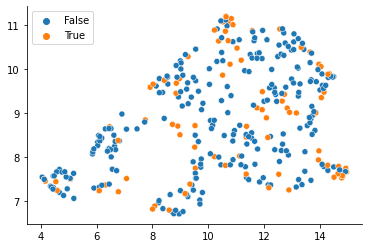

In [422]:
sns.scatterplot(x = x_features[:,0],y = x_features[:,1], hue = y_train)
sns.despine()

In [423]:
clf.coef_

array([[1.03316466e-04, 2.25199601e-04, 2.58166228e-08, ...,
        5.39318397e-08, 9.75766642e-07, 2.59108955e-07]])

In [424]:
import numpy as np

In [425]:
np.argmax(clf.coef_)

1431

In [426]:
top_genes=x.index.values.flatten()[np.argsort(-clf.coef_).flatten()][:5].tolist()

In [427]:
top_genes

['EPHX1', 'CHI3L1', 'ORM1', 'REG3A', 'CYP2D6']

Text(0.5, 1.0, 'EPHX1')

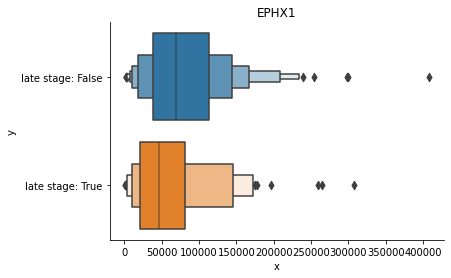

In [428]:
idx=0
expr_values=pd.DataFrame(dict(y=np.vectorize(lambda x: f"late stage: {bool(x)}")(y),x=x.loc[top_genes[idx]]))
sns.boxenplot(x="x",y="y",data=expr_values)
sns.despine()
plt.title(top_genes[idx])

In [429]:
x.T.columns[4815]

'TGFBI'

In [430]:
k = 3
z = clf.coef_.reshape((-1))
np.argpartition(z, len(clf.coef_) - k)[-k:]

array([3302,  797, 1431])

In [431]:
.T.columns[3493]

SyntaxError: invalid syntax (3419037846.py, line 1)

In [ ]:
df.columns.tolist()

In [ ]:
#| .value_counts()#.sum()

In [ ]:
df.shape